### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

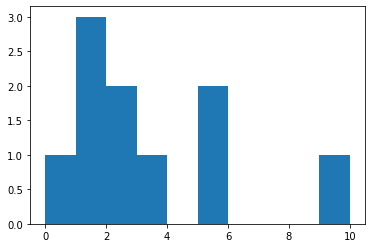

In [9]:
plt.hist(X[1])
plt.show()

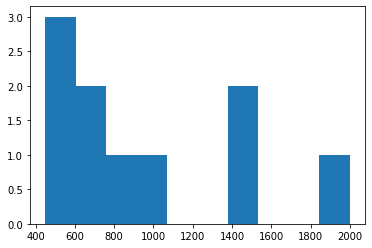

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

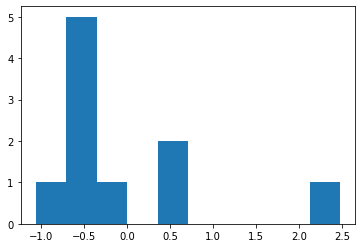

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
#sklern.StandartScaler() #Стандартизайия
#sklern.MinMaxScaler() #Нормализация

In [16]:
X_st[2] = calc_std_fit(X[2])

In [17]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [18]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.12576116  4.63815785  3.74188458  3.92162177] 84.4690352970238
200 [55.52203172  5.18245929  2.92627822  4.28163398] 27.73674615416534
300 [56.37030228  5.51374488  2.28060984  4.62655986] 26.10642321043344
400 [56.48279955  5.72812383  1.7716937   4.94279819] 25.680949633549954
500 [56.49771888  5.8721866   1.36648276  5.21996737] 25.4169594352171
600 [56.49969748  5.9726855   1.04148831  5.45660214] 25.24405014520136
700 [56.49995988  6.04526303  0.77949938  5.65540105] 25.129861042943414
800 [56.49999468  6.09926858  0.56755472  5.82071222] 25.054197535463523
900 [56.49999929  6.14044624  0.39567845  5.95726561] 25.003984769397277
1000 [56.49999991  6.17244246  0.25606395  6.06957114] 24.970638463245784


array([56.49999991,  6.17244246,  0.25606395,  6.06957114])

In [21]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
W_esm = eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062032  6.31269808 -0.36447226  6.58452741] 11.289337927156481
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182004990096
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403


L1 регуляризация

L2 регуляризация

In [23]:
# lambda = lambda_/2

# Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [24]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        #print(f'lam = {lambda_}, w = {W}')
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [25]:
W_lambda1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=0.000001)

In [26]:
W_lambda2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=0.001)

In [27]:
W_lambda3 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=0.1)

In [28]:
W_lambda4 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1)

In [29]:
W_lambda5 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=10)

In [30]:
W_lambda6 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=100)

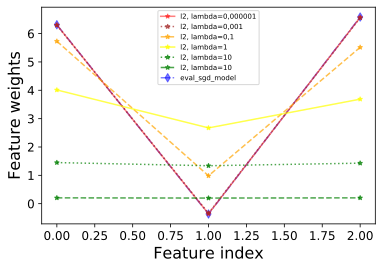

In [31]:
# Задание 1.
# Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#для более четкого отображения графиков, векторный формат
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
matplotlib.rcParams.update({'font.size': 12})

plt.plot(W_lambda1[1:],alpha=0.5,linestyle='-',marker='*',markersize=5,color='red',label='l2, lambda=0,000001',zorder=2)
plt.plot(W_lambda2[1:],alpha=0.7,linestyle=':',marker='*',markersize=5,color='brown',label='l2, lambda=0,001',zorder=3)
plt.plot(W_lambda3[1:],alpha=0.7,linestyle='--',marker='*',markersize=5,color='orange',label='l2, lambda=0,1',zorder=4)
plt.plot(W_lambda4[1:],alpha=0.7,linestyle='-',marker='*',markersize=5,color='yellow',label='l2, lambda=1',zorder=5)
plt.plot(W_lambda5[1:],alpha=0.7,linestyle=':',marker='*',markersize=5,color='green',label='l2, lambda=10',zorder=6)
plt.plot(W_lambda6[1:],alpha=0.7,linestyle='--',marker='*',markersize=5,color='green',label='l2, lambda=10',zorder=7)
plt.plot(W_esm[1:],alpha=0.5,linestyle='-.',marker='d',markersize=6,color='blue',label='eval_sgd_model', zorder=1)

plt.xlabel('Feature index',fontsize=16)
plt.ylabel('Feature weights',fontsize=16)
plt.legend(fontsize=7,loc='best')
plt.show()

# Из графика видно, что с помощью гиперпараметра лямбда, можно контролировать на сколько мы штрафуем коэффициенты модели, так
# более высокие значения лямбда создают более простые модели, например, при лямбда=0.000001 штрафы оказались незаметными,
# а при альфа=10 штрафы регуляризовали модель значительно.


In [32]:
# Вопрос 2:
# Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

# Чтобы ответить на этот вопрос, нужно дать определение этих двух терминов, так:

# Стандартизация данных – это процесс приведения вектора каждого признака к такому виду,
# что его математическое ожидание станет нулевым, а дисперсия – единичной.

# Нормализация данных – это процесс масштабирования вектора каждого признака,
# то есть приведение его к такому виду, что признак или вектор будет иметь единичную норму
# (при этом есть разные способы оценки/подсчета нормы).

# Стандартизации - выравнивания разброса, может оказаться достаточно для повышения качества данных,
# однако при этом значения разных векторов не будут в одинаковом диапазоне, например от 0 до 1, они будут
# иметь лишь стандартный разброс в рамках признака (вектора). Поэтому, для того чтобы достичь одинакового
# масштаба признаков необходима нормализация, к слову есть несколько ее видов.

# Поэтому ответ на поставленный выше вопрос, такой, что можно к одному и тому же признаку применить сразу
# и нормализацию, и стандартизацию, но это будет зависеть от поставленной задачи, когда
# стандартизированные данные нужно привести к одинаковому масштабу признаков.


In [33]:
# Задание 3.
# Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

# Так как я не совсем понял как работает функция, т.е. не понял где возведение в квадрат (формула L2 это предполагает),
# то возможно я не так превратил функцию в функцию подсчета L1
# Однако, далее реализовал функцию подсчета L1 воспользовавшись sKlearn

def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        #err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot(y_pred - y, np.sign(X.T)) + lambda_ * W)
    return W

In [34]:
W_l1 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=10)

In [35]:
print(f'Функция L1: {W_l1},\nФункция L2: {W_lambda5}\nИзменения в весах признаков: \n {W_l1 - W_lambda5}')

Функция L1: [ 9.41666667 -1.11794056 -0.04223343  1.54083196],
Функция L2: [9.41666667 1.44984507 1.33835494 1.42938586]
Изменения в весах признаков: 
 [ 0.         -2.56778563 -1.38058836  0.1114461 ]


In [36]:
# Функция регуляризации L1 с помощью sklearn

from sklearn.linear_model import Lasso

def func_with_sklrn_l1(X,y,alpha_):
    regresion = Lasso(alpha=alpha_)
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    y_pred = np.dot(W, X)
    
    y_np = np.array(y) 
    mod_l1 = regresion.fit(y_np.reshape(-1, 2), y_pred.reshape(-1, 2))
    
    return mod_l1.coef_


In [37]:
func_with_sklrn_l1(X_st,y,1e-2)

array([[ 0.18172777, -0.02300157],
       [ 0.09981492,  0.0840664 ]])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.